In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [140]:
#path to the csv file and show the csv file

graph_data_path = "Resources/state_covid_data.csv"

graph_data = pd.read_csv(graph_data_path)

graph_data.head(454)


,Unnamed: 0,States,date,Total positive,Total negaitive,Total test,deaths
0,0,Alabama,April,6038.0,73879.0,79917.0,30
1,1,Alabama,August,38335.0,257485.0,289359.0,31
2,2,Alabama,July,49678.0,233137.0,280879.0,31
3,3,Alabama,June,20142.0,168957.0,184836.0,30
4,4,Alabama,March,981.0,6288.0,7269.0,19
...,...,...,...,...,...,...,...
449,449,Wyoming,June,584.0,8695.0,9279.0,30
450,450,Wyoming,March,109.0,1999.0,2108.0,21
451,451,Wyoming,May,344.0,14588.0,14932.0,31
452,452,Wyoming,October,3578.0,13542.0,17120.0,19


In [201]:
group_df = graph_data.groupby(['States','date']) 
clean_df = graph_data['deaths'].sum()
clean_df

12719

In [4]:
#count the number of unique values in the States Column

graph_data['States'].value_counts()

Illinois                    10
Arizona                     10
California                  10
Washington                  10
Utah                         9
Wisconsin                    9
Nebraska                     9
Oregon                       9
Texas                        9
Massachusetts                9
Kentucky                     8
Hawaii                       8
South Dakota                 8
Michigan                     8
Nevada                       8
Missouri                     8
Indiana                      8
Northern Mariana Islands     8
West Virginia                8
Kansas                       8
South Carolina               8
Virgin Islands               8
New Hampshire                8
Minnesota                    8
Rhode Island                 8
Florida                      8
Wyoming                      8
District of Columbia         8
Pennsylvania                 8
New York                     8
Tennessee                    8
Arkansas                     8
Virginia

In [5]:
number_states = graph_data['States'].nunique()

print(f'There are {number_states} states in this data set.')

There are 55 states in this data set.


In [161]:
states_positive_df = graph_data.groupby(['States']).sum()

new_positive = states_positive_df.drop(columns=['Unnamed: 0', 'Total negaitive', 'Total test'])

new_positive.drop(['Guam'], axis=0, inplace=True)
new_positive.drop(['District of Columbia'], axis=0, inplace=True)
new_positive.drop(['Virgin Islands'], axis=0, inplace=True)
new_positive.drop(['Northern Mariana Islands'], axis=0, inplace=True)
new_positive.drop(['Puerto Rico'], axis=0, inplace=True)

new_positive.head(100)

,Total positive,deaths
States,,
Alabama,174528.0,221
Alaska,12432.0,222
Arizona,232935.0,268
Arkansas,100441.0,223
California,874024.0,269
Colorado,86372.0,229
Connecticut,64455.0,226
Delaware,23325.0,223
Florida,760387.0,233


In [162]:
#verify 

print(len(new_positive))

50


In [175]:
percentage_death_postive = graph_data.drop(columns=['Unnamed: 0', 'date', 'States', 
                                       'Total negaitive', 'Total test'])

percentage_death_postive

percentages = percentage_death_postive['deaths']/percentage_death_postive['Total positive']

round(percentages,4)

new_positive['percentages'] = round((new_positive['deaths']/new_positive['Total positive'])*100 ,5)

final_percentage = new_positive['percentages']

In [165]:
states_only = graph_data.drop(columns=['Unnamed: 0', 'date', 'Total positive', 
                                       'Total negaitive', 'Total test', 'deaths'])

new_states_only = states_only.drop_duplicates()

new_states_only

,States
0,Alabama
8,Alaska
16,Arizona
26,Arkansas
34,California
44,Colorado
52,Connecticut
60,Delaware
68,District of Columbia
76,Florida


In [166]:
states_list = new_states_only['States'].tolist()

print(states_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


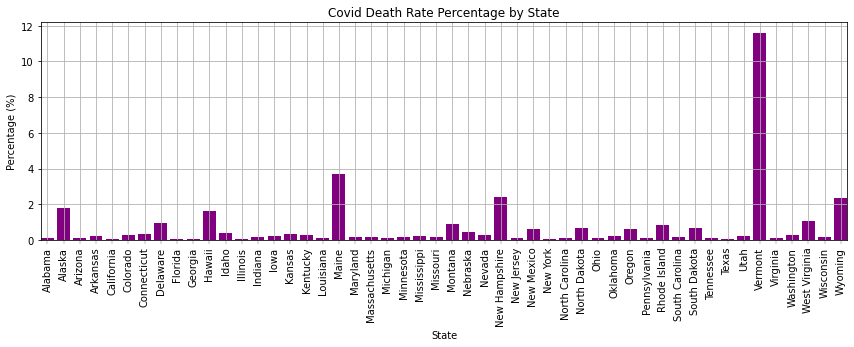

In [193]:
#x_axis = state amount

x_axis = np.arange(len(new_positive))

tick_mark = [tick for tick in x_axis]

plt.xticks(tick_mark, ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
                       'Connecticut', 'Delaware', 'Florida', 
                       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 
                       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
                       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
                       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
                       'Oklahoma', 'Oregon', 'Pennsylvania','Rhode Island', 'South Carolina', 
                       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
                       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], rotation = 'vertical')




plt.bar(x_axis, final_percentage, color="purple")

plt.tick_params(axis='x', which='major', labelsize=10, width=0.25)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*55+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])

plt.title("Covid Death Rate Percentage by State")
plt.ylabel("Percentage (%)")
plt.xlabel("State")
plt.grid()

plt.savefig("percentages_vs_states", dpi=300)